In [89]:
#importing liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error

In [90]:
#importing dataset
data=pd.read_csv(r"E:\data trained projects\happiness_score_dataset.csv")

In [91]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [92]:
data.shape

(158, 12)

In [93]:
#'Region','Happiness Rank' does not provide relevent information hence droped
data=data.drop(labels=['Region','Happiness Rank','Country'],axis=1)

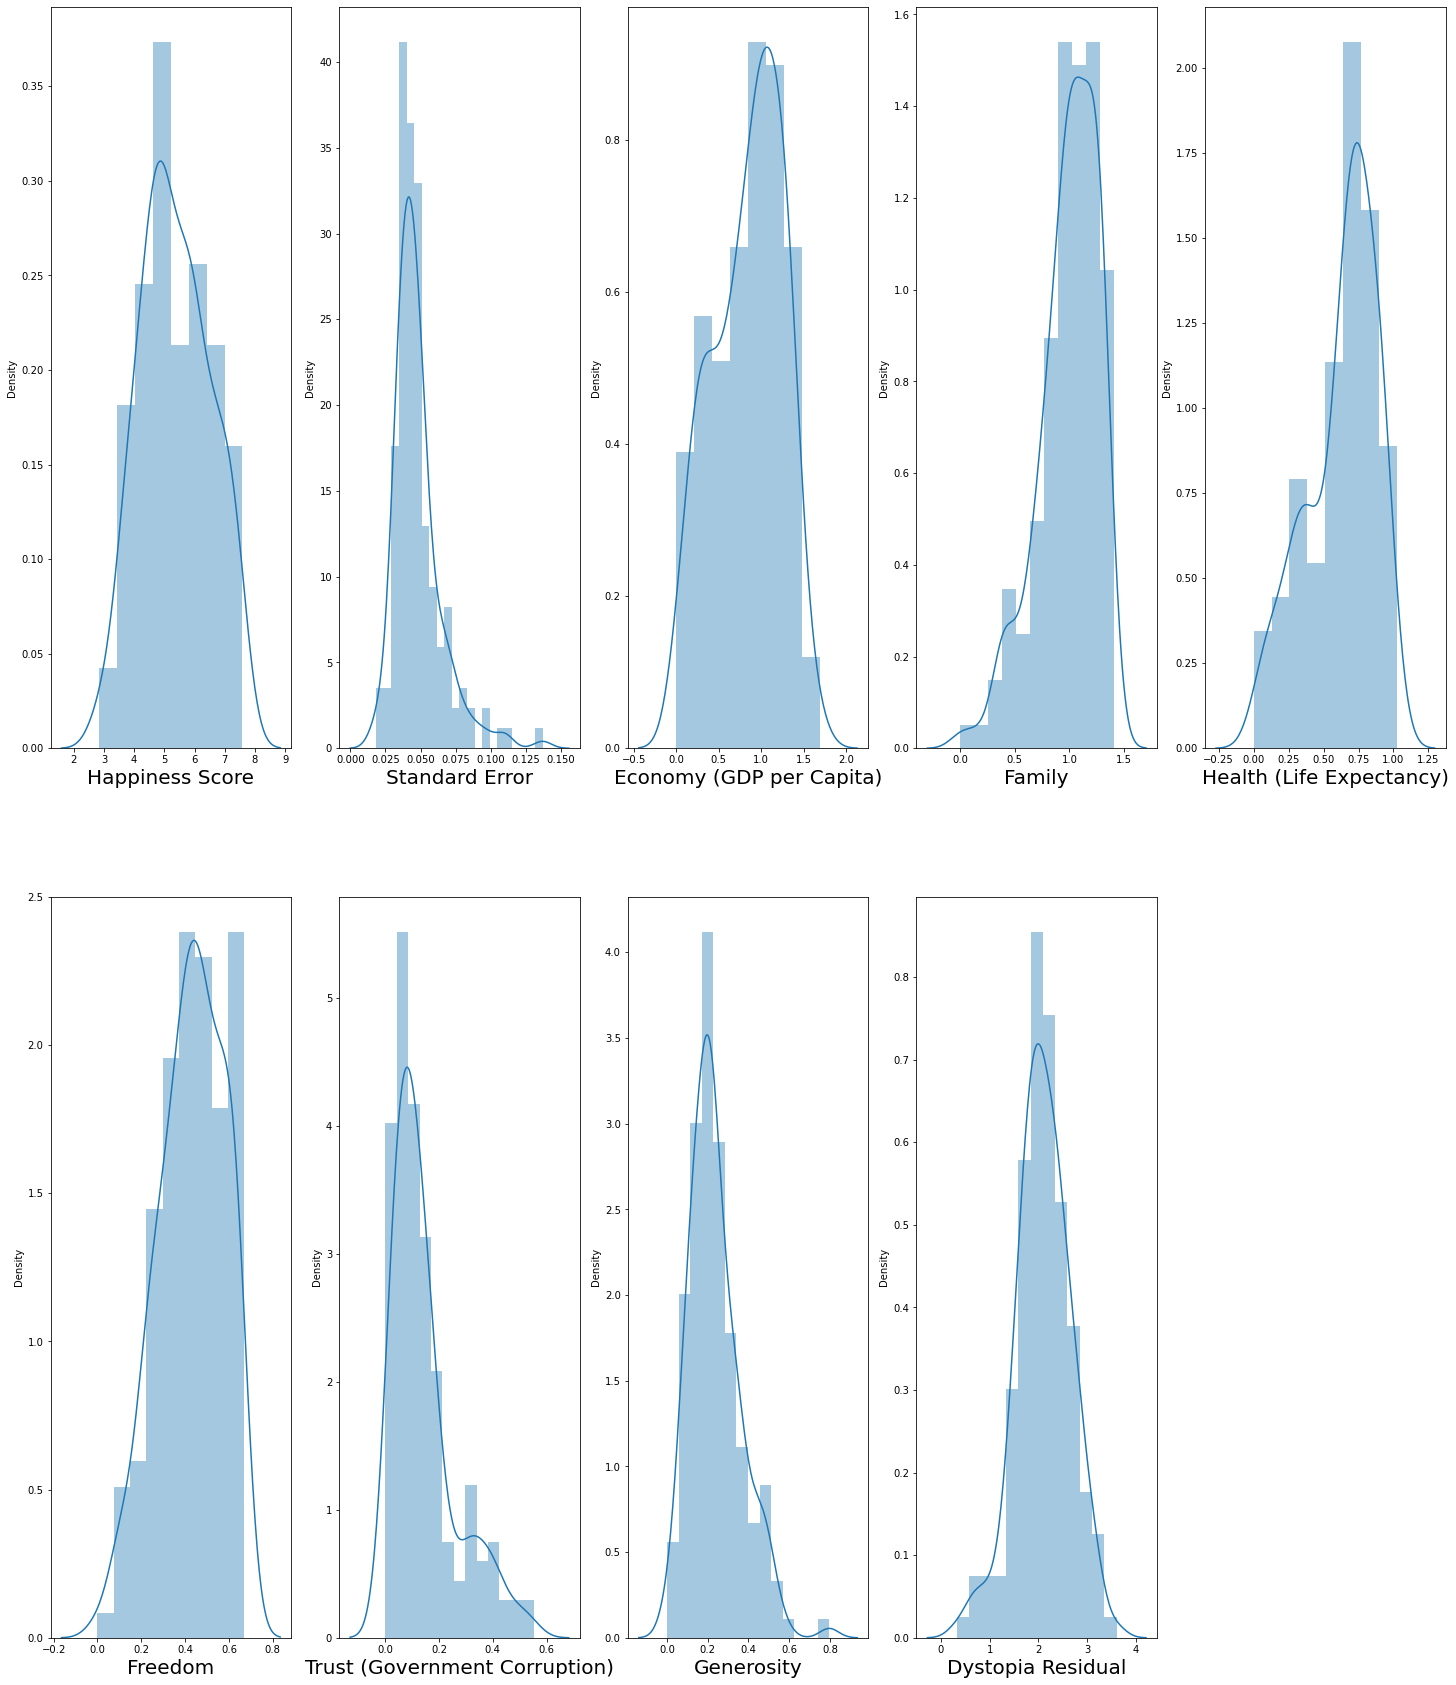

In [94]:
plt.figure(figsize=(25,30))
plotnumber=1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [95]:
x=data.drop(labels=['Happiness Score'],axis=1)
y=data['Happiness Score']

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler=StandardScaler()

In [98]:
x_scaled=scaler.fit_transform(x)

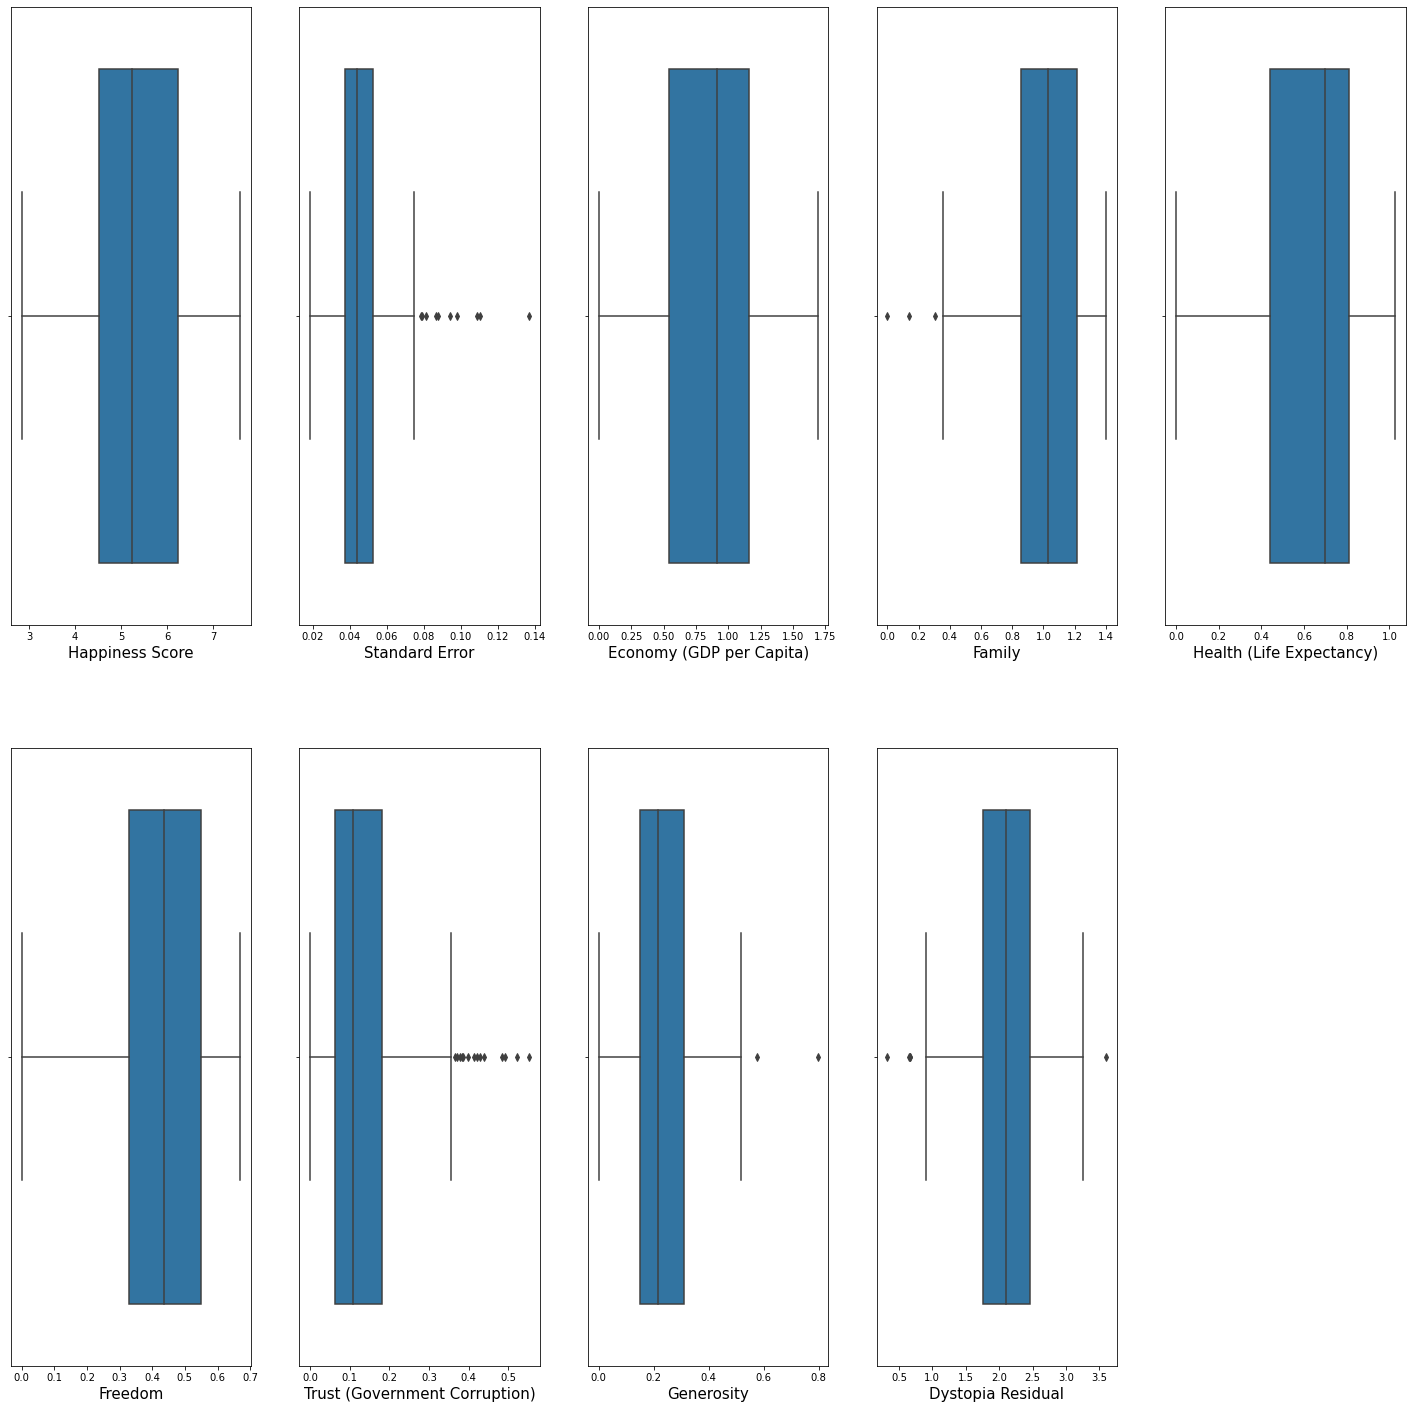

In [99]:
plt.figure(figsize=(25,25))
graph=1
for column in data:
    if graph<=30:
        ax=plt.subplot(2,5,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [100]:
from scipy.stats import zscore
z_score=zscore(data[['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score < 2).all(axis=1)

data=data[filtering_entry]
data.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.393458,0.046430,0.863879,1.028920,0.636508,0.413885,0.122494,0.212527,2.115268
std,1.021167,0.011784,0.372783,0.210076,0.239089,0.146470,0.088615,0.106310,0.467565
min,3.587000,0.018480,0.000000,0.464750,0.000000,0.000000,0.002270,0.000000,0.998950
25%,4.639750,0.038282,0.594172,0.891802,0.460545,0.320625,0.058570,0.126970,1.791085
50%,5.260500,0.044515,0.919550,1.033960,0.700925,0.416795,0.104710,0.203505,2.074475
75%,5.989000,0.051095,1.148357,1.217087,0.800358,0.531430,0.157820,0.272970,2.447057
max,7.561000,0.080960,1.563910,1.402230,0.991110,0.669730,0.377980,0.479980,3.191310


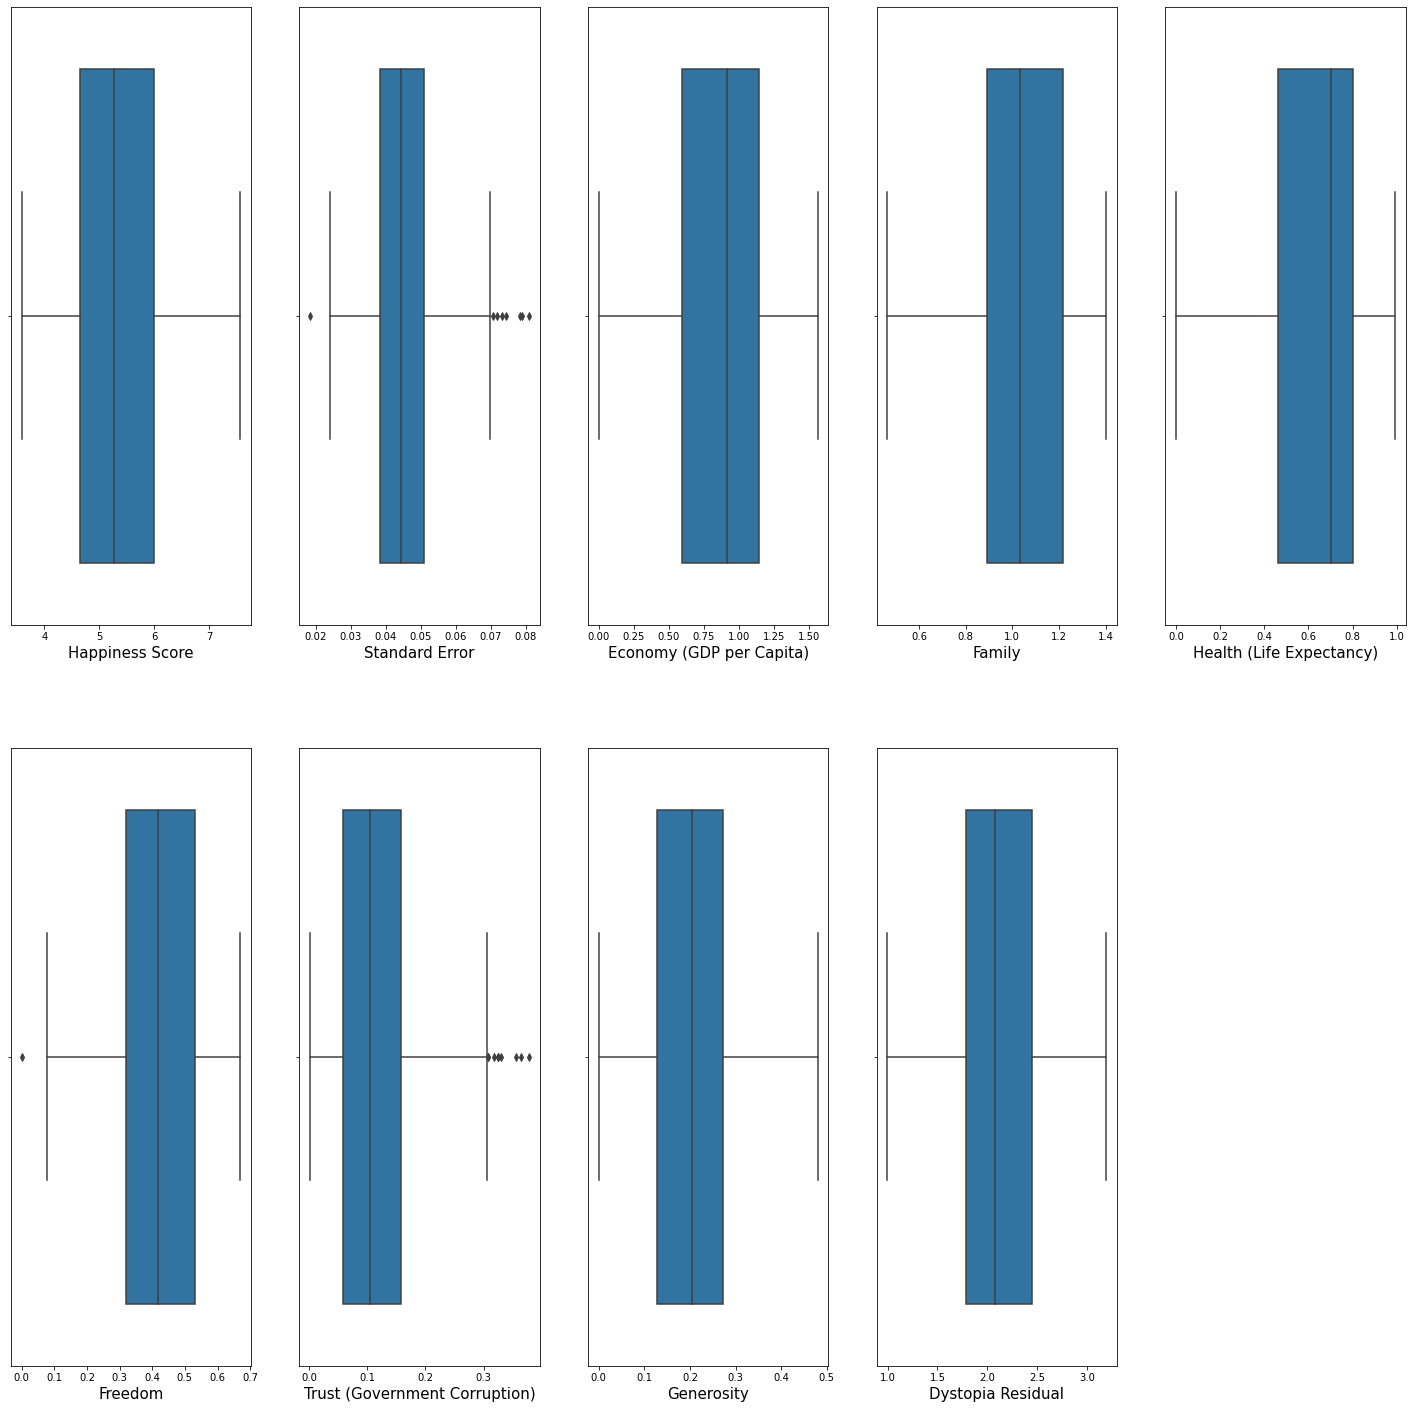

In [101]:
plt.figure(figsize=(25,25))
graph=1
for column in data:
    if graph<=30:
        ax=plt.subplot(2,5,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

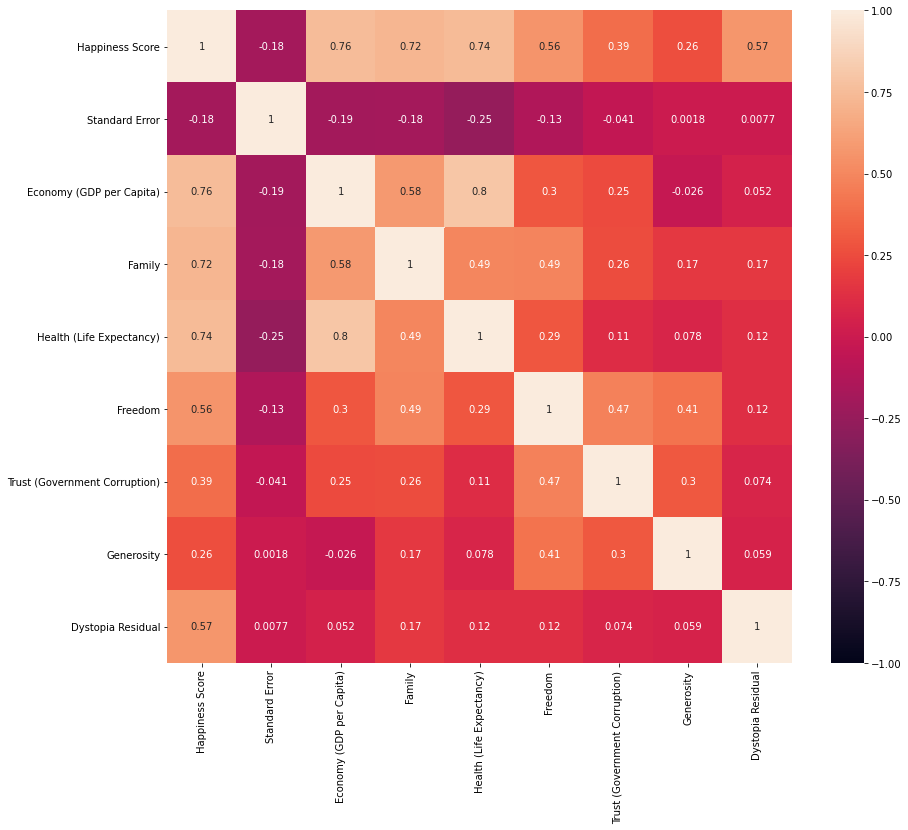

In [102]:
# check features correlation
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [103]:
#dataset has no null value
data.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [104]:
data.dtypes

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [105]:
# traning the model
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=55)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [108]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
knn=KNeighborsRegressor()

In [109]:
lr

LinearRegression()

In [110]:
dt

DecisionTreeRegressor()

In [111]:
rf

RandomForestRegressor()

In [112]:
knn

KNeighborsRegressor()

In [113]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [114]:
lr.score(x_test,y_test)

0.9999999258554819

In [115]:
pred1=lr.predict(x_test)

In [116]:
mean_absolute_error(y_test,pred1)

0.00026585233417282067

In [117]:
dt.score(x_test,y_test)

0.721247859983626

In [118]:
pred2=dt.predict(x_test)

In [119]:
mean_absolute_error(y_test,pred2)

0.47856249999999995

In [120]:
pred3=rf.predict(x_test)

In [121]:
mean_absolute_error(y_test,pred3)

0.3167452083333335

In [122]:
knn.score(x_test,y_test)

0.8529278524152831

In [123]:
pred4=knn.predict(x_test)

In [124]:
mean_absolute_error(y_test,pred4)

0.34662499999999996

In [125]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_absolute_error')

In [126]:
lr_score_n=-lin_score
lr_score_n

array([0.00020704, 0.00025743, 0.00025894, 0.00030264, 0.0002606 ])

In [127]:
np.mean(lr_score_n)

0.0002573289751531031

In [128]:
dt_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_absolute_error')

In [129]:
dt_score_n=-dt_score
dt_score_n

array([0.75759375, 0.57015625, 0.570875  , 0.54106452, 0.913     ])

In [130]:
np.mean(dt_score_n)

0.6705379032258064

In [131]:
rf_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_absolute_error')

In [132]:
rf_score_n=-rf_score
rf_score_n

array([0.89544531, 0.2748875 , 0.22983594, 0.23327387, 0.9397329 ])

In [133]:
np.mean(rf_score_n)

0.5146351048387099

In [134]:
knn_score=cross_val_score(knn,x,y,cv=5,scoring='neg_mean_absolute_error')

In [135]:
knn_score_n=-knn_score
knn_score_n

array([0.8746625 , 0.31809375, 0.22146875, 0.3287871 , 0.88426452])

In [136]:
np.mean(knn_score_n)

0.5254553225806451

In [137]:
import pickle
filename='finalized_model.pkl'
pickle.dump(lr,open('linear','wb'))

In [ ]:
#knn model is the best algorithm